<a href="https://colab.research.google.com/github/Mina-T/Machine-learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from random import random

In [ ]:
x = torch.arange(0,1,0.01).unsqueeze(dim =1)
y = 0.6 * x + 0.7 
rand = torch.rand(100).unsqueeze(dim =1)
y = torch.add(y , 0.2 * rand)
rand = torch.rand(100).unsqueeze(dim =1)
y = torch.add(y , -0.15 * rand)


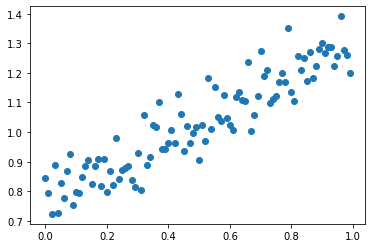

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(x, y)

In [ ]:
splitting = int(len(x)*0.6)
splitting

60

In [ ]:
prediction_splitting = int(len(x)*0.8)
prediction_splitting

80

In [ ]:
training_x, training_y = x[:splitting], y[:splitting]
testing_x, testing_y = x[splitting:prediction_splitting], y[splitting:prediction_splitting]

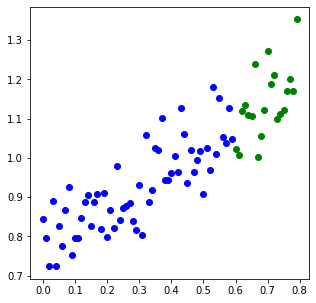

In [ ]:
from matplotlib import pyplot as plt
def visualizer(training_x = training_x,
               training_y = training_y,
               testing_x = testing_x,
               testing_y = testing_y,
               prediction = None):
  plt.figure(figsize = (5,5))
  plt.scatter(training_x, training_y, color = 'b')
  plt.scatter(testing_x, testing_y, color = 'g')
  
observe = visualizer(training_x,training_y,testing_x,testing_y)


In [ ]:
from torch import nn
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features = 1,
                                out_features = 1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


In [ ]:
model = LinearRegression()
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.9083]])),
             ('linear_layer.bias', tensor([-0.3690]))])

In [ ]:
next(model.parameters()).device

device(type='cpu')

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.05)

In [ ]:
torch.manual_seed(42)
epochs = 400
no_epoch = []
training_loss = []
testing_loss = []
for epoch in range(epochs):
  no_epoch.append(epoch)
  model.train()
  pred = model(training_x)
  loss = loss_fn(pred, training_y)
  training_loss.append(loss.detach().numpy())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  # print(model.state_dict())
  model.eval()
  with torch.inference_mode():
    test_pred = model(testing_x)
    test_loss = loss_fn(test_pred, testing_y)
    testing_loss.append(test_loss)




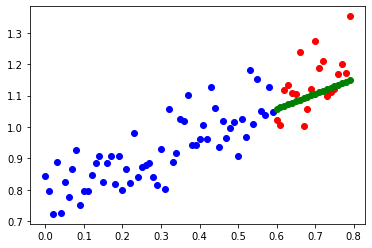

In [ ]:
plt.scatter(training_x, training_y, color = 'b', label = 'training')
plt.scatter(testing_x, testing_y, color = 'r', label = 'testing')
plt.scatter(testing_x, test_pred, color = 'g', label = 'prediction')

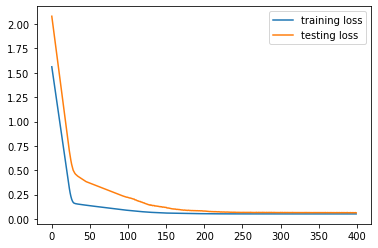

In [ ]:
plt.plot(no_epoch, training_loss, label = 'training loss')
plt.plot(no_epoch, testing_loss, label = 'testing loss')
plt.legend()

In [ ]:
from pathlib import Path

In [ ]:
Model_path = Path('Models') # create model directory
print(Model_path)
Model_path.mkdir(parents = True, exist_ok = True)

# Save

Model_name = "Linear_layer"
Model_save_path = Model_path / Model_name

Models


In [ ]:
torch.save(obj = model.state_dict(), f = Model_save_path)

In [ ]:
loaded_model = LinearRegression()


In [ ]:
print(loaded_model.load_state_dict(torch.load(Model_save_path)))


<All keys matched successfully>
